In [1]:
from rich import print
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fp = "/home/numina/Documents/repos/CARL/experiments/attack_on_agents/tmp/2022-06-14/16-27-46/eval_data/eval_data.npz"
eval_data = np.load(fp, allow_pickle=True).item()
context = eval_data["context"]
transitions = eval_data["transitions"]
states = np.array([t[1] for t in transitions])
angles = np.arctan2(states[:, 1], states[:, 0]) % (2 * np.pi)
angles = angles / (2 * np.pi) * 360
angular_velocities = states[:, 2]

plt.scatter(angles, angular_velocities)
plt.show()

plt.hist(angles, bins=50, label="angles")
plt.xlabel(r"$\theta$")
plt.show()

plt.hist(angular_velocities, bins=50, label="velocities")
plt.xlabel(r"$\dot\theta$")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/numina/Documents/repos/CARL/experiments/attack_on_agents/tmp/2022-06-14/16-27-46/eval_data/eval_data.npz'

/home/benjamin/Dokumente/code/tmp/CARL/tmp/2022-06-17/12-30-00/9

/tmp/ipykernel_26376/797767979.py:81: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(scatter, ax=ax, label=cbar_label)


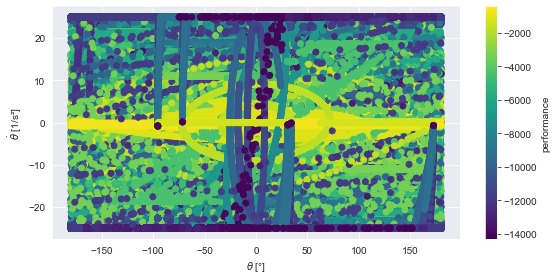

/tmp/ipykernel_26376/797767979.py:103: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(scatter, ax=ax, label=cbar_label)


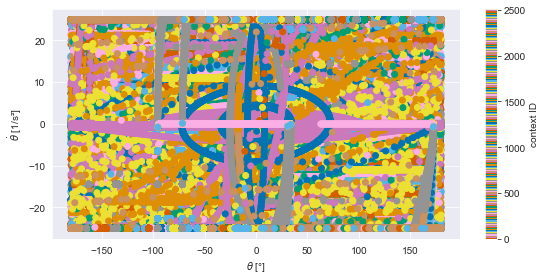

In [75]:
import numpy as np
import glob
import os
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import itertools


def transitions_to_states(transitions):
    states = np.array([t[1] for t in transitions])
    # calculate angle with theta = atan2(y/x) = atan2(sin(theta)/cos(theta))
    angles = np.arctan2(states[:, 1], states[:, 0])
    angles = angles % (2 * np.pi) - np.pi  # move to range -pi, pi
    angles = angles / (2 * np.pi) * 360  # convert radian to degree
    angular_velocities = states[:, 2]
    return angles, angular_velocities


def normalize(A):
    A_min = np.amin(A)
    ptp = np.ptp(A)
    return (A - A_min) / ptp


def add_steps_to_episode_ids(E):
    S = np.zeros_like(E)
    k = 0
    e_last = 0
    for i, e in enumerate(E):
        if e != e_last:
            k = 0
            e_last = e
        S[i] = k
        k += 1
    return S


# Collect all states
# plt.rcParams['axes.grid'] = False
out_dir = "/home/numina/Documents/repos/CARL/experiments/attack_on_agents/tmp/2022-06-14/16-55-48"
out_dir = "/home/benjamin/Dokumente/code/tmp/CARL/experiments/attack_on_agents/tmp/2022-06-16/21-21-37"
out_dir = "/home/benjamin/Dokumente/code/tmp/CARL/tmp/2022-06-17/08-08-21"
out_dir = "/home/benjamin/Dokumente/code/tmp/CARL/tmp/2022-06-17/12-30-00"
print(os.getcwd())
eval_data_fps = glob.glob(os.path.join(out_dir, "**", "eval_data/*.npz"), recursive=True)
eval_data_list = [np.load(fp, allow_pickle=True).item() for fp in eval_data_fps]
performance_list = np.array([D["performance"] for D in eval_data_list])
performance_normalized = normalize(performance_list)
state_list = [transitions_to_states(D["transitions"]) for D in eval_data_list]
angle_list = [S[0] for S in state_list]
velocity_list = [S[1] for S in state_list]

P = np.concatenate([[perf] * len(a) for perf, a in zip(performance_list, angle_list)])
Theta = np.concatenate(angle_list)
Theta_dot = np.concatenate(velocity_list)
context_ids = np.concatenate([[i] * len(a) for i, a in enumerate(angle_list)])

transition_list = [D["transitions"] for D in eval_data_list]
T = list(itertools.chain(*transition_list))
E = [t[0] for t in T]
steps = add_steps_to_episode_ids(E)


data = pd.DataFrame({
    "performance": P,
    "angle": Theta,
    "angular_velocity": Theta_dot,
    "context_id": context_ids,
    "step": steps
})

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
scatter = ax.scatter(x=Theta, y=Theta_dot, c=P, cmap="viridis")
cbar_label = "performance"
ax.set_xlabel(r"$\theta$ [°]")
ax.set_ylabel(r"$\dot\theta$ [1/s²]")
fig.colorbar(scatter, ax=ax, label=cbar_label)
fig.set_tight_layout(True)
plt.show()

# fig = plt.figure(figsize=(8,4))
# ax = fig.add_subplot(111)
# scatter = ax.scatter(x=Theta, y=Theta_dot, c=steps, cmap="viridis")
# cbar_label = "step"
# ax.set_xlabel(r"$\theta$ [°]")
# ax.set_ylabel(r"$\dot\theta$ [1/s²]")
# fig.colorbar(scatter, ax=ax, label=cbar_label)
# fig.set_tight_layout(True)
# plt.show()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
cmap = sns.color_palette("colorblind", n_colors=len(np.unique(context_ids)))
cmap = ListedColormap(cmap.as_hex())
scatter = ax.scatter(x=Theta, y=Theta_dot, c=context_ids, cmap=cmap)
cbar_label = "context ID"
ax.set_xlabel(r"$\theta$ [°]")
ax.set_ylabel(r"$\dot\theta$ [1/s²]")
fig.colorbar(scatter, ax=ax, label=cbar_label)
fig.set_tight_layout(True)
plt.show()

In [45]:
data

,performance,angle,angular_velocity,context_id,step
0,-1112.530010,-130.693793,-0.460427,0,0
1,-1112.530010,-130.383744,0.108227,0,1
2,-1112.530010,-128.437065,0.679519,0,2
3,-1112.530010,-124.807417,1.266987,0,3
4,-1112.530010,-119.413607,1.882794,0,4
...,...,...,...,...,...
740995,-13273.534217,-11.134242,-24.997377,740,195
740996,-13273.534217,142.026520,24.997377,740,196
740997,-13273.534217,-11.134242,-24.997377,740,197
740998,-13273.534217,142.026520,24.997377,740,198


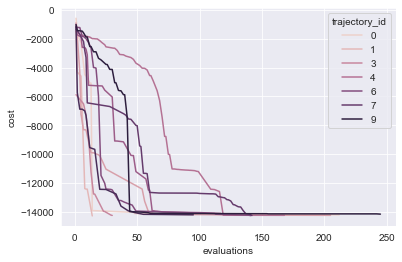

In [76]:
import glob
import os
import json
import pandas as pd


def read_jsonl(fp):
    with open(fp, 'r') as file:
        lines = file.readlines()
    data = [json.loads(l) for l in lines]
    return data

smac_folders = glob.glob(os.path.join(out_dir, "**", "smac*", "run_*"), recursive=True)
tj_id = "traj.json"
trajectories = []
for i, smac_folder in enumerate(smac_folders):
    traj_fp = os.path.join(smac_folder, tj_id)
    trajectory = read_jsonl(traj_fp)
    trajectory = pd.DataFrame(trajectory)
    trajectory["trajectory_id"] = i
    trajectory.drop([0], inplace=True)  # drop the first row bc it contains cost of 2e9
    trajectories.append(trajectory)

# trajectories = pd.concat([pd.DataFrame(T) for T in trajectories])
trajectories = pd.concat(trajectories)
trajectories.reset_index(drop=True, inplace=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.lineplot(data=trajectories, x="evaluations", y="cost", hue="trajectory_id", ax=ax)
plt.show()

In [77]:
# Refit GPs
import glob
import os
from pathlib import Path

from smac.facade.smac_ac_facade import SMAC4AC
from smac.facade.smac_bb_facade import SMAC4BB
from smac.runhistory.runhistory import RunHistory
from smac.scenario.scenario import Scenario
from smac.stats.stats import Stats
from smac.utils.io.traj_logging import TrajLogger

smac_folders = glob.glob(os.path.join(out_dir, "**", "smac*", "run_*"), recursive=True)

for smac_folder in smac_folders:
    old_output_dir = smac_folder
    scenario_path = os.path.join(old_output_dir, "scenario.txt")
    smac_path = Path(smac_folder)
    os.chdir(smac_path.parent.parent)
    scenario = Scenario(scenario_path)

    # We load the runhistory
    rh_path = os.path.join(old_output_dir, "runhistory.json")
    runhistory = RunHistory()
    runhistory.load_json(rh_path, scenario.cs)

    # And the stats
    stats_path = os.path.join(old_output_dir, "stats.json")
    stats = Stats(scenario)
    stats.load(stats_path)

    # And the trajectory
    traj_path = os.path.join(old_output_dir, "traj_aclib2.json")
    trajectory = TrajLogger.read_traj_aclib_format(fn=traj_path, cs=scenario.cs)
    incumbent = trajectory[-1]["incumbent"]

    # Now we can initialize SMAC with the recovered objects and restore the
    # state where we left off. By providing stats and a restore_incumbent, SMAC
    # automatically detects the intention of restoring a state.
    smac = SMAC4BB(
        scenario=scenario,
        runhistory=runhistory,
        stats=stats,
        restore_incumbent=incumbent,
        run_id=1,
    )
    # TODO try DeepCAVE
    print(smac.solver.epm_chooser.model)
    break


Adding unsupported scenario options: {'save_results_instantly': 'True'}


<smac.epm.gaussian_process_mcmc.GaussianProcessMCMC object at 0x7f0218229bb0>